<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


http://yann.lecun.com/exdb/mnist/ 

In [2]:
print(train_images.ndim)

3


In [3]:
print(train_images.shape)

(60000, 28, 28)


In [4]:
print(train_images.dtype)

uint8


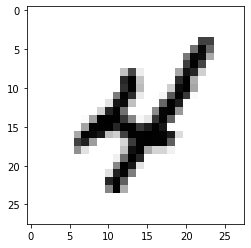

In [5]:
digit = train_images[9]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

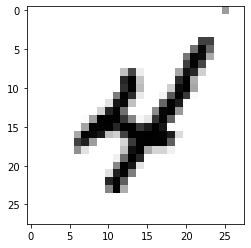

In [6]:
digit[0][25]=100
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [7]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [8]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [9]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

## Problema 1:
Dentro del conjunto de datos, seleccióne la esquina inferior que contenga $14\times14$ píxeles en cada una de las imágenes y visualice una de ellas. 

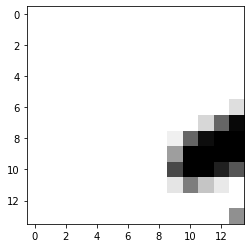

In [10]:
#Esquina inferior Solución#
my_slice = train_images[0:100, 0:14, 0:14]
my_slice.shape
digit = my_slice[5]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

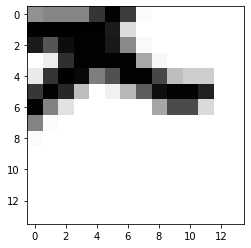

In [11]:
my_slice2 = train_images[:, -15:-1, -15:-1]
digit = my_slice2[5]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Problema 2:

Escriba un código en Python que devuelva el máximo valor de un vector.

In [13]:

#Máximo valor de un vector#
import numpy as np
Vector= np.array([12, 3, 6, 14])
MaxVector=np.max(Vector)
print (MaxVector)


def max_array1D(arr): 
      max = arr[0] 

      for i in range(1, len(arr)): 
        if arr[i] > max: 
            max = arr[i] 
      return max

Vector

print (max_array1D(Vector))

14
14


## Problema 3:

Creen una clase `Point` en coordenadas cartesianas, que se su constructor inicialice el objeto a un punto con unas coordenadas dadas. Además, la clase debe contener dos métodos:

* `translate()`, que reciba como argumentos dos valores arbitrarios $(x,y)$.
* `__str__(self)`: que imprima el punto en precisión de coma flotante.

In [14]:
class Point:
  def __init__(self,XX,YY):
    self.este = XX
    self.norte = YY

  def translate(self, dx, dy):
    self.este += dx
    self.norte += dy
        
  def __str__(self):
    return("Point at [%f, %f]" % (self.este, self.norte))

Coordenada=Point(43,55)
print('Este:',Coordenada.este)
print('Norte:',Coordenada.norte)

Este: 43
Norte: 55


In [15]:
from tensorflow import keras

In [16]:
from keras.datasets import fashion_mnist

https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [18]:
X_train_full.shape

(60000, 28, 28)

In [19]:
X_train_full.dtype

dtype('uint8')

In [20]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [21]:
y_train[0]

4

In [22]:
import matplotlib.pyplot as plt 
#import seaborn as sns; sns.set()

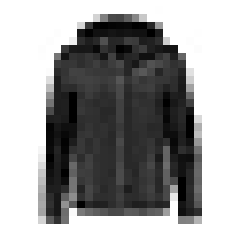

In [23]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off');

In [24]:
import numpy as np

In [25]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [26]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [27]:
class_names[y_train[0]]

'Coat'

In [28]:
X_valid.shape

(5000, 28, 28)

In [29]:
X_test.shape

(10000, 28, 28)

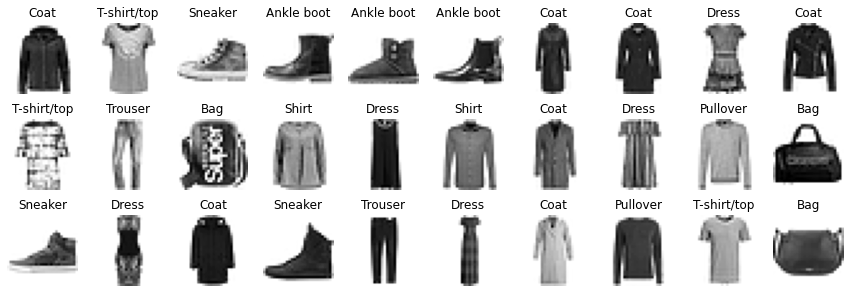

In [30]:
fig , ax =  plt.subplots(3,10, figsize=(15,5))
for i , ax in enumerate(ax.flat):
  ax.imshow(X_train[i], cmap='binary')
  ax.set_axis_off()
  ax.set_title(class_names[y_train[i]])

In [31]:
keras.backend.clear_session()

In [32]:
model = keras.models.Sequential();
model.add(keras.layers.Flatten(input_shape=[28, 28]));
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(100, activation="relu"));
model.add(keras.layers.Dense(10, activation="softmax"));

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', 
              metrics=["accuracy"])

In [35]:
history =  model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7167 - accuracy: 0.7679 - val_loss: 0.5027 - val_accuracy: 0.8258
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4843 - accuracy: 0.8321 - val_loss: 0.4474 - val_accuracy: 0.8436
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4388 - accuracy: 0.8469 - val_loss: 0.4348 - val_accuracy: 0.8460
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4135 - accuracy: 0.8543 - val_loss: 0.4058 - val_accuracy: 0.8590
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3941 - accuracy: 0.8614 - val_loss: 0.3789 - val_accuracy: 0.8680
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3774 - accuracy: 0.8679 - val_loss: 0.3713 - val_accuracy: 0.8726
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3645 - accuracy: 0.8717 - val_loss: 0.3879 - val_accuracy:

In [36]:
import pandas as pd

In [37]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.716747,0.767945,0.502721,0.8258
1,0.484253,0.832145,0.447403,0.8436
2,0.438812,0.846873,0.434782,0.8460
3,0.413500,0.854309,0.405752,0.8590
4,0.394123,0.861382,0.378898,0.8680


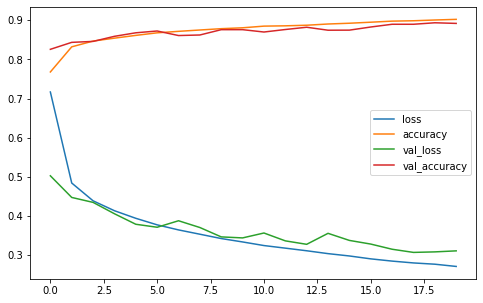

In [38]:
df.plot(figsize=(8, 5))

In [39]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8759


[0.34108737111091614, 0.8758999705314636]

In [40]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
y_pred = (model.predict(X_new)>0.5).astype("int32")
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [42]:
np.array(class_names)[y_pred]

array([['T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'Trouser'],
       ['T-shirt/top', 'T-shirt/top', 'Trouser', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top'],
       ['T-shirt/top', 'Trouser', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top', 'T-shirt/top', 'T-shirt/top',
        'T-shirt/top', 'T-shirt/top']], dtype='<U11')

In [43]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

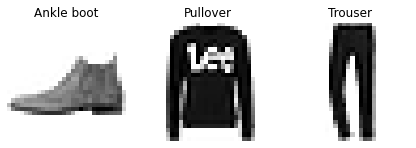

In [44]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)

## Reto  

Suba una imagen propia y haga una predicción usando el modelo entrenado

In [45]:
from google.colab import files
uploaded = files.upload()
#Usando OpenCV
import cv2
data = cv2.imread("zapato2.jpg",cv2.IMREAD_GRAYSCALE)
print(data.shape)
data2 = cv2.resize(data,(28,28))

data3=data2/255
data3=data3.reshape(1,28,28)
#print(data2.shape)
#Predecir
y_pred = (model.predict(data3)>0.5).astype("int32")
y_pred
#y_pred = model.predict_classes(X_new.reshape(1,28,28))

Saving zapato2.jpg to zapato2.jpg
(271, 528)


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [ ]:
from google.colab import files
uploaded = files.upload()
#Usando OpenCV
import cv2
data = cv2.imread("vestido.jpg",cv2.IMREAD_GRAYSCALE)
print(data.shape)
data2 = cv2.resize(data,(28,28))

data3=data2/255
data3=data3.reshape(1,28,28)
#print(data2.shape)
#Predecir
y_pred = (model.predict(data3)>0.5).astype("int32")
y_pred
